In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist, fashion_mnist
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Conv2D, Input, concatenate
from keras.models import Sequential, Model
from keras.utils import plot_model, to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
data = mnist.load_data()
X_train, y_train = data[0][0], data[0][1]
X_test, y_test = data[1][0], data[1][1]
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)
y_train = pd.get_dummies(pd.Categorical(y_train)).values
y_test = pd.get_dummies(pd.Categorical(y_test)).values

In [2]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Flatten())
model1.add(Dense(10, activation = 'softmax'))
model1.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

In [5]:
history_model1 = model1.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))
history_model2 = model2.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/5


473/473 [==============================] - 9s 17ms/step - loss: 1.7778 - accuracy: 0.9000 - val_loss: 0.3669 - val_accuracy: 0.9441
Epoch 2/5
473/473 [==============================] - 7s 14ms/step - loss: 0.1887 - accuracy: 0.9637 - val_loss: 0.2048 - val_accuracy: 0.9595
Epoch 3/5
473/473 [==============================] - 6s 12ms/step - loss: 0.0908 - accuracy: 0.9768 - val_loss: 0.1556 - val_accuracy: 0.9659
Epoch 4/5
473/473 [==============================] - 5s 11ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.1429 - val_accuracy: 0.9694
Epoch 5/5
473/473 [==============================] - 5s 11ms/step - loss: 0.0385 - accuracy: 0.9874 - val_loss: 0.1912 - val_accuracy: 0.9640
Epoch 1/5
473/473 [==============================] - 9s 18ms/step - loss: 0.7944 - accuracy: 0.9069 - val_loss: 0.1731 - val_accuracy: 0.9584
Epoch 2/5
473/473 [==============================] - 8s 17ms/step - loss: 0.1013 - accuracy: 0.9719 - val_loss: 0.0988 - val_accuracy: 0.9687
Epoc

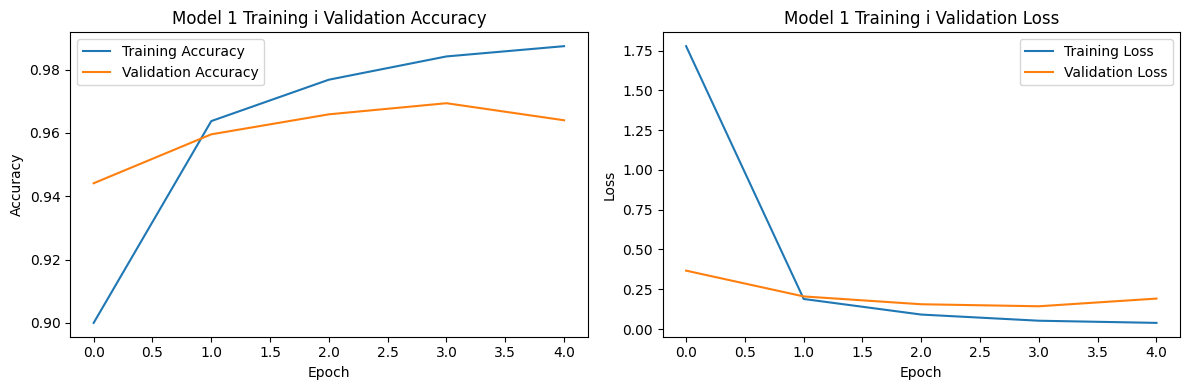

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_model1.history['accuracy'], label='Training Accuracy')
plt.plot(history_model1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 Training i Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_model1.history['loss'], label='Training Loss')
plt.plot(history_model1.history['val_loss'], label='Validation Loss')
plt.title('Model 1 Training i Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

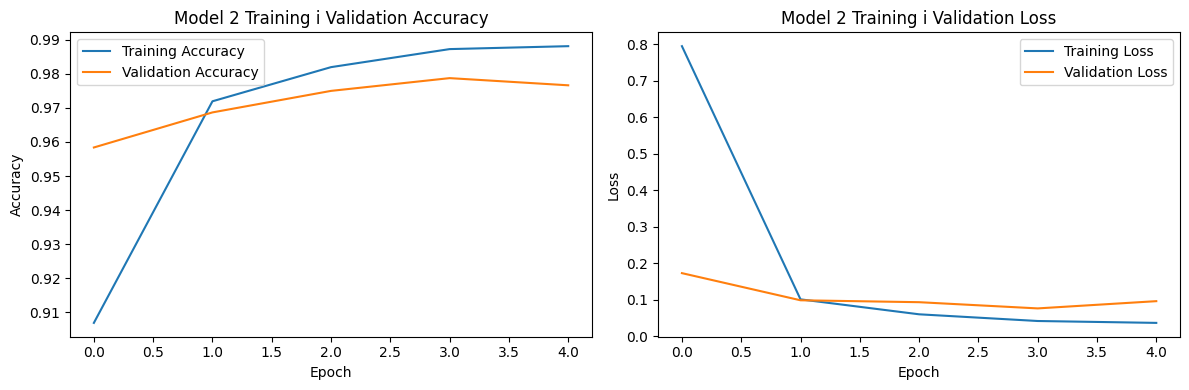

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_model2.history['accuracy'], label='Training Accuracy')
plt.plot(history_model2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 Training i Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_model2.history['loss'], label='Training Loss')
plt.plot(history_model2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Training i Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

272/272 [==============================] - 1s 3ms/step


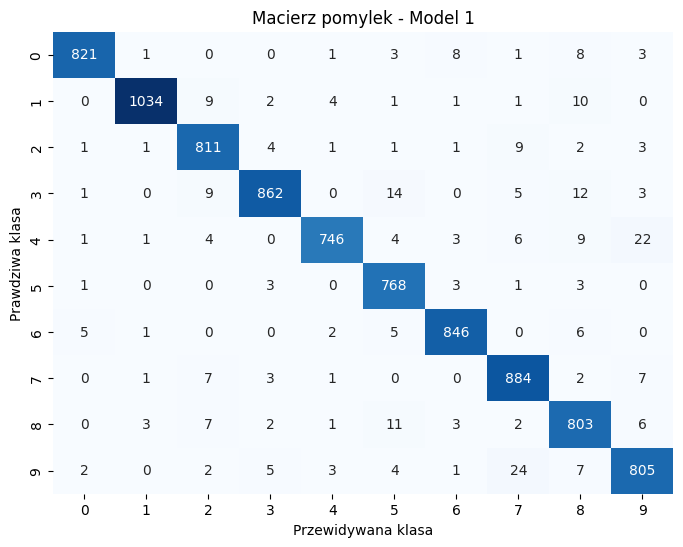

In [8]:
y_pred_model1 = model1.predict(X_test)
y_true_model1 = np.argmax(y_test, axis=1)
y_pred_labels_model1 = np.argmax(y_pred_model1, axis=1)
conf_matrix_model1 = confusion_matrix(y_true_model1, y_pred_labels_model1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_model1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Macierz pomylek - Model 1")
plt.xlabel("Przewidywana klasa")
plt.ylabel("Prawdziwa klasa")
plt.show()



272/272 [==============================] - 1s 4ms/step


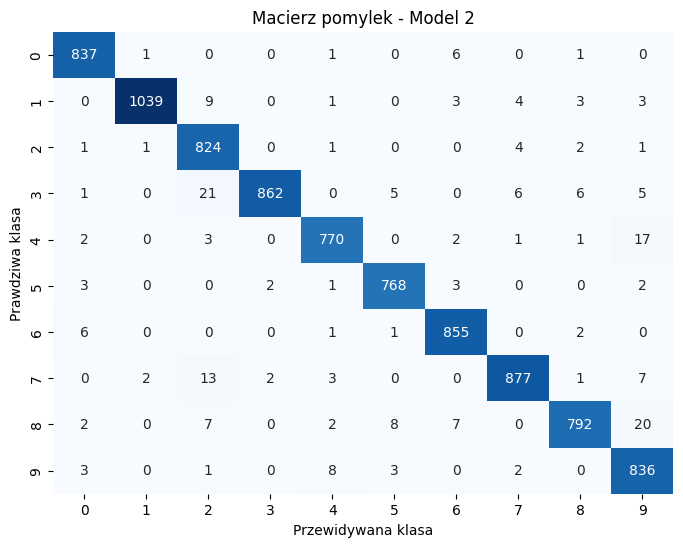

In [9]:
y_pred_model2 = model2.predict(X_test)
y_true_model2 = np.argmax(y_test, axis=1)
y_pred_labels_model2 = np.argmax(y_pred_model2, axis=1)
conf_matrix_model2 = confusion_matrix(y_true_model2, y_pred_labels_model2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_model2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Macierz pomylek - Model 2")
plt.xlabel("Przewidywana klasa")
plt.ylabel("Prawdziwa klasa")
plt.show()

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full = X_train_full[:5000]
y_train_full = y_train_full[:5000]

X_train_full = np.expand_dims(X_train_full, axis=-1) 
X_test = np.expand_dims(X_test, axis=-1)
y_train_full = to_categorical(y_train_full)
y_test = to_categorical(y_test)

X_train, X_temp, y_train, y_temp = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
input_layer = Input(shape=(28, 28, 1))
mod_1_1 = Conv2D(32, (1, 1), padding='same', activation='relu')(input_layer)
mod_1_1 = Conv2D(32, (3, 3), padding='same', activation='relu')(mod_1_1)

mod_1_2 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_layer)
mod_1_2 = Conv2D(32, (1, 1), padding='same', activation='relu')(mod_1_2)

inception_module1 = concatenate([mod_1_1, mod_1_2], axis=3)

mod_2_1 = Conv2D(32, (1, 1), padding='same', activation='relu')(inception_module1)
mod_2_1 = Conv2D(32, (3, 3), padding='same', activation='relu')(mod_2_1)

mod_2_2 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(inception_module1)
mod_2_2 = Conv2D(32, (1, 1), padding='same', activation='relu')(mod_2_2)

inception_module2 = concatenate([mod_2_1, mod_2_2], axis=3)    

combined_inception = concatenate([inception_module1, inception_module2], axis=3)


In [12]:
flatten_layer = Flatten()(combined_inception)
output_layer = Dense(10, activation='softmax')(flatten_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/20
16/16 [==============================] - 12s 617ms/step - loss: 372.0586 - accuracy: 0.3320 - val_loss: 140.0017 - val_accuracy: 0.5660
Epoch 2/20
16/16 [==============================] - 9s 554ms/step - loss: 75.9221 - accuracy: 0.6267 - val_loss: 25.9475 - val_accuracy: 0.7540
Epoch 3/20
16/16 [==============================] - 9s 548ms/step - loss: 25.4930 - accuracy: 0.7630 - val_loss: 20.6183 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 8s 473ms/step - loss: 12.7495 - accuracy: 0.8123 - val_loss: 15.0740 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 7s 434ms/step - loss: 8.6467 - accuracy: 0.8317 - val_loss: 10.7744 - val_accuracy: 0.8480
Epoch 6/20
16/16 [==============================] - 7s 432ms/step - loss: 5.3346 - accuracy: 0.8660 - val_loss: 10.9651 - val_accuracy: 0.8440
Epoch 7/20
16/16 [==============================] - 7s 441ms/step - loss: 5.3005 - accuracy: 0.8662 - val_loss: 7.6930 - val_accuracy: 

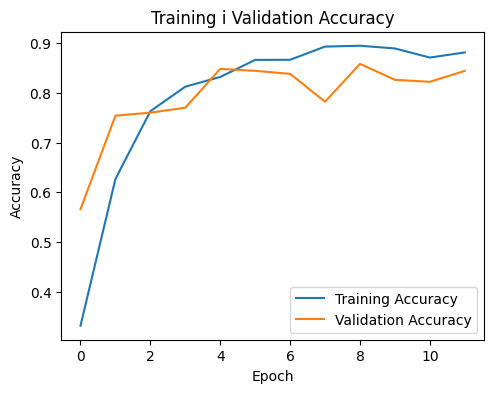

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_val, y_val), callbacks=[early_stopping])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training i Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



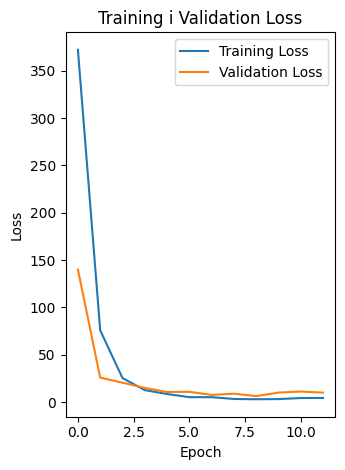

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training i Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

16/16 [==============================] - 1s 24ms/step


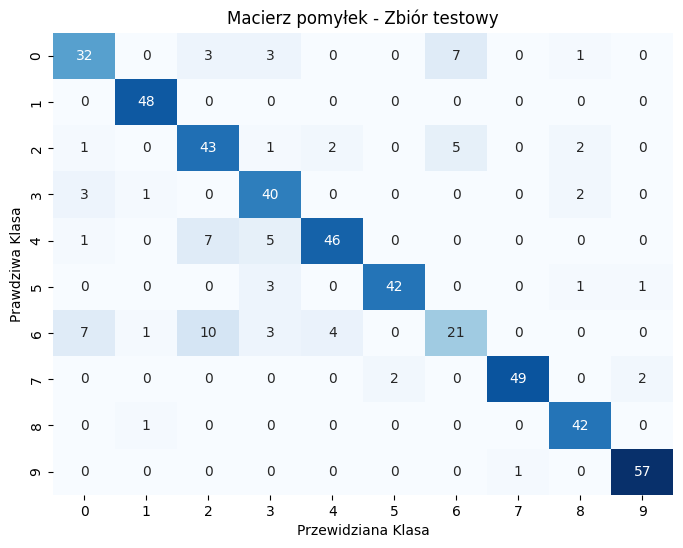

In [16]:
conf_matrix = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Macierz pomyłek - Zbiór testowy")
plt.xlabel("Przewidziana Klasa")
plt.ylabel("Prawdziwa Klasa")
plt.show()


In [20]:
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#Image("model_plot.png")

In [21]:
for layer in model.layers:
    print(layer.name, layer.output_shape)

input_1 [(None, 28, 28, 1)]
conv2d_3 (None, 28, 28, 32)
max_pooling2d_3 (None, 28, 28, 1)
conv2d_4 (None, 28, 28, 32)
conv2d_5 (None, 28, 28, 32)
concatenate (None, 28, 28, 64)
conv2d_6 (None, 28, 28, 32)
max_pooling2d_4 (None, 28, 28, 64)
conv2d_7 (None, 28, 28, 32)
conv2d_8 (None, 28, 28, 32)
concatenate_1 (None, 28, 28, 64)
concatenate_2 (None, 28, 28, 128)
flatten_2 (None, 100352)
dense_2 (None, 10)


In [22]:
mod_1_1 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_layer)
mod_1_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(mod_1_1)

mod_1_2 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_layer)
mod_1_2 = Conv2D(64, (5, 5), padding='same', activation='relu')(mod_1_2)

mod_1_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_layer)
mod_1_3 = Conv2D(64, (1, 1), padding='same', activation='relu')(mod_1_3)

inception_module1 = concatenate([mod_1_1, mod_1_2, mod_1_3], axis=3)

mod_2_1 = Conv2D(128, (1, 1), padding='same', activation='relu')(inception_module1)
mod_2_1 = Conv2D(128, (3, 3), padding='same', activation='relu')(mod_2_1)

mod_2_2 = Conv2D(128, (1, 1), padding='same', activation='relu')(inception_module1)
mod_2_2 = Conv2D(128, (5, 5), padding='same', activation='relu')(mod_2_2)

mod_2_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(inception_module1)
mod_2_3 = Conv2D(128, (1, 1), padding='same', activation='relu')(mod_2_3)

inception_module2 = concatenate([mod_2_1, mod_2_2, mod_2_3], axis=3)

combined_inception = concatenate([inception_module1, inception_module2], axis=3)

flatten_layer = Flatten()(combined_inception)
output_layer = Dense(10, activation='softmax')(flatten_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/20
125/125 [==============================] - 103s 797ms/step - loss: 116.1174 - accuracy: 0.6485 - val_loss: 20.8655 - val_accuracy: 0.8020
Epoch 2/20
125/125 [==============================] - 95s 762ms/step - loss: 21.3185 - accuracy: 0.7893 - val_loss: 18.6127 - val_accuracy: 0.8260
Epoch 3/20
125/125 [==============================] - 97s 773ms/step - loss: 15.7300 - accuracy: 0.8403 - val_loss: 11.9748 - val_accuracy: 0.8560
Epoch 4/20
125/125 [==============================] - 96s 765ms/step - loss: 11.5073 - accuracy: 0.8680 - val_loss: 12.6827 - val_accuracy: 0.8440
Epoch 5/20
 69/125 [===============>..............] - ETA: 50s - loss: 6.9774 - accuracy: 0.8986

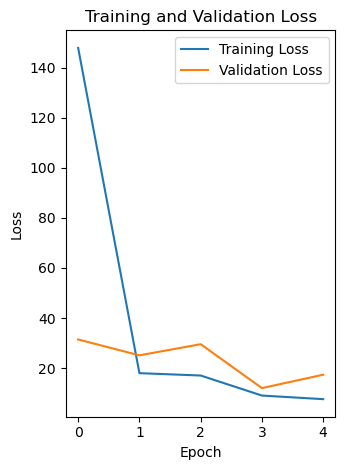

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training i Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

16/16 [==============================] - 3s 180ms/step


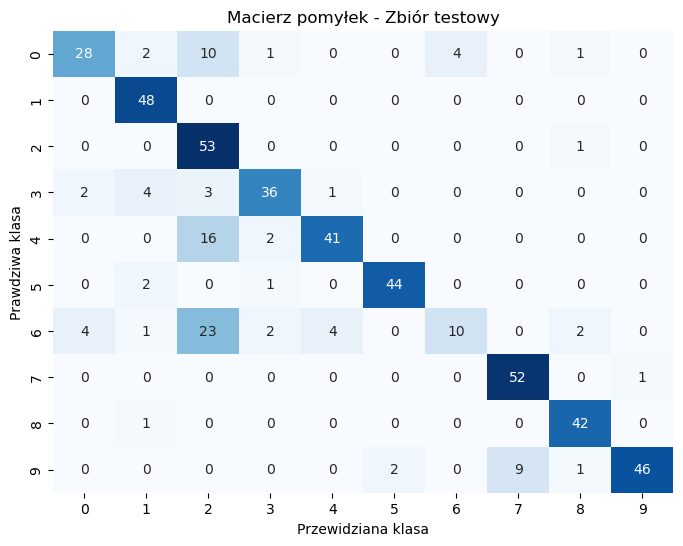

In [ ]:
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Macierz pomyłek - Zbiór testowy")
plt.xlabel("Przewidziana klasa")
plt.ylabel("Prawdziwa klasa")
plt.show()